Add raster data to a Ugrid NetCDF


An example on how to add raster data (smaller or larger cells) to an existing Ugrid NetCDF file to be used as layers

In [1]:
#load required libraries and prepare logging
import os
import xarray as xr
import xugrid as xu
import logging

logger = logging.getLogger(__name__)

import sys  
sys.path.insert(1, '../library')
from DEcoImpact_conv_func import DEIModel

In [2]:
#configuration
input_ugrid_file = r'..\tests\testdata\ugrid_netcdf\small_subset_FM-VZM_0000_map.nc'
input_raster_file_fine =r'..\tests\rawdata\lakevolkerak_rasters\bathymetry_VolkerakZoommeer_25x25m.tif'
crs_code_raster = "epsg:28992" 

ds_out = r'input_DEI_small_subset_with_rasters_FM-VZM_0000_map.nc' # output location of file that can be loaded by D-Eco Impact
crs_code = "epsg:28992"                                   # coordinate system applicable to file


In [3]:
#initialize
DEI = DEIModel()
cwd = os.getcwd()
DEI.set_root(root = cwd)

#read Netcdf
region_dict = {"ugrid": input_ugrid_file }
DEI.setup_ugrid(region = region_dict, crs = crs_code)

#add the other grids when they are same in resolution
DEI.add_raster_data(fn = input_raster_file_fine, name = "bathymetry", translation = "smaller_mean", crs = crs_code_raster)
DEI.add_raster_data(fn = input_raster_file_fine, name = "bathymetry", translation = "smaller_min" , crs = crs_code_raster)
DEI.add_raster_data(fn = input_raster_file_fine, name = "bathymetry", translation = "smaller_max" , crs = crs_code_raster)

#check results
print(DEI._mesh2d)

#export result
DEI.write_mesh(fn_temp = "example_output_data/temporary_file.nc", fn_ecoimpact = "example_output_data/"+ds_out)

print("Done.")

 - processed 0 of 101 features
 - processed 0 of 101 features
 - processed 0 of 101 features
<xarray.Dataset> Size: 13MB
Dimensions:                (mesh2d_nNodes: 71, mesh2d_nEdges: 171,
                            mesh2d_nFaces: 101, mesh2d_nMax_face_nodes: 4,
                            time: 230, mesh2d_nLayers: 22)
Coordinates:
    mesh2d_node_x          (mesh2d_nNodes) float64 568B 7.54e+04 ... 7.595e+04
    mesh2d_node_y          (mesh2d_nNodes) float64 568B 4.06e+05 ... 4.054e+05
    mesh2d_edge_x          (mesh2d_nEdges) float64 1kB ...
    mesh2d_edge_y          (mesh2d_nEdges) float64 1kB ...
    mesh2d_face_x          (mesh2d_nFaces) float64 808B ...
    mesh2d_face_y          (mesh2d_nFaces) float64 808B ...
  * time                   (time) datetime64[ns] 2kB 2010-10-01 ... 2016-12-31
  * mesh2d_nNodes          (mesh2d_nNodes) int64 568B 0 1 2 3 4 ... 67 68 69 70
  * mesh2d_nEdges          (mesh2d_nEdges) int64 1kB 0 1 2 3 ... 167 168 169 170
  * mesh2d_nFaces          (m

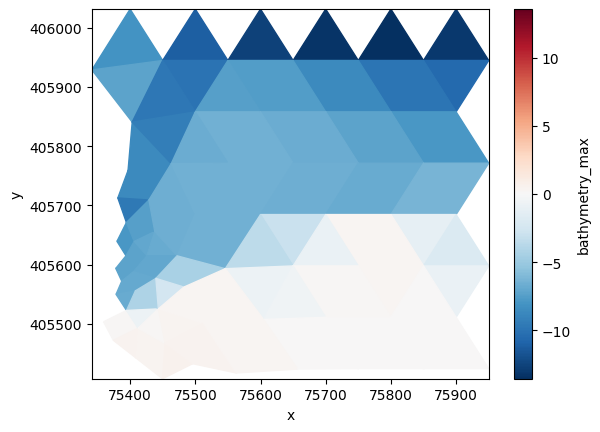

In [4]:
#visualize results
with xu.open_mfdataset("example_output_data/"+ds_out) as result:
    result["bathymetry_max"].ugrid.plot()
